In [1]:
#import libraries 
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

#### Let's load the neighborhoods data and look at the first few rows
(https://data.nashville.gov/Metro-Government/Neighborhood-Association-Boundaries-GIS-/qytv-2cu8)


In [2]:
neighborhoods = gpd.read_file('./data/Zip Codes (GIS).geojson')
neighborhoods.head(1)

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37027,34,BRENTWOOD,3140.581074908484,595244.46435546875,"(POLYGON ((-86.684745973484 35.992792089723, -..."


#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


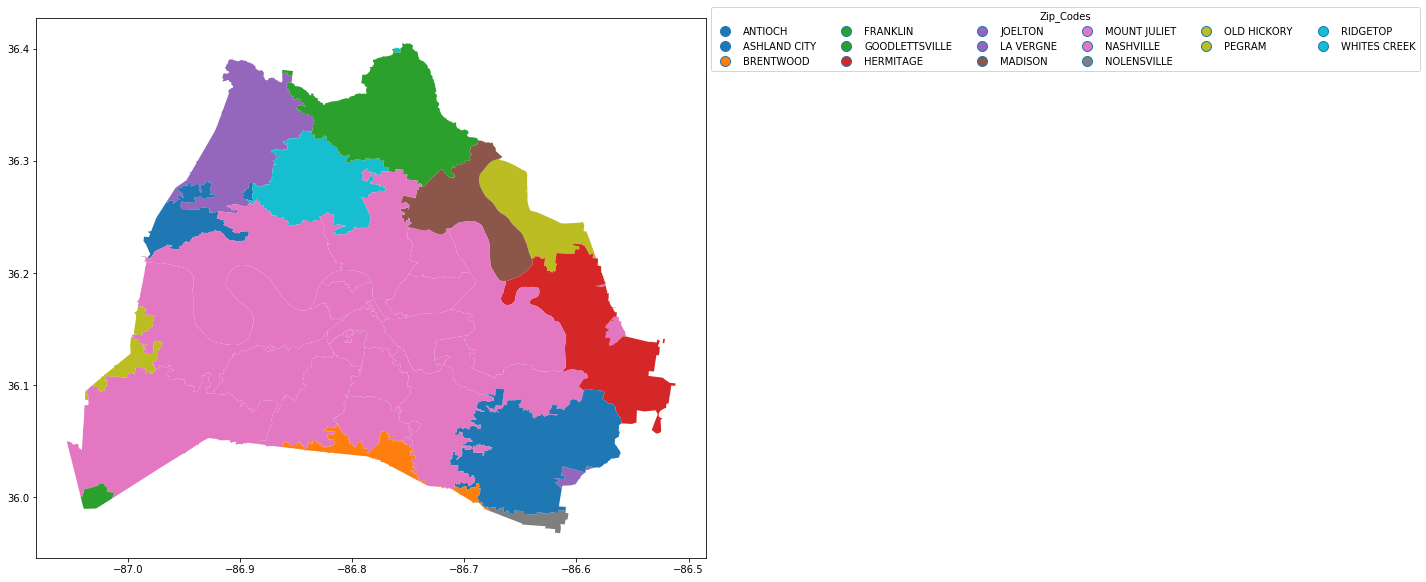

In [3]:
#geopandas handles legend styling if you pass a dict of keywords
leg_kwds = {'title': 'Zip_Codes', 'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 6}
neighborhoods.plot(column = 'po_name', figsize=(12, 12), legend = True, legend_kwds = leg_kwds)
plt.show()

#### Public Works in Nashville


In [3]:
pw = pd.read_csv('./data/Metro_Public_Works_Capital_Projects.csv')
pw.head()

,CP ID,Project Number,Project Category,Project Type,Project Name,Project Location,Description,Justification,Council District,Plan Cost,...,Project SubType,Priority,Phase,PPA Number,x Coordinate,y Coordinate,Latitude,Longitude,Map URL,Mapped Location
0,5274,NaN,Traffic,New Traffic Signal,Metro Fire Station No 19 - Traffic Signal,AT CHARLOTTE AVE AND 26TH AVENUE NORTH,Install/modify intersection control features,To provide traffic control features that will ...,21,5936.00,...,New,Medium,Complete,130-03016,1.727710e+06,663933.196954,36.154530,-86.815630,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.15452982, -86.81562974)"
1,53,NaN,Sidewalk,Sidewalk Repairs,Woodland Street Sidewalk Repairs,Woodland Street from South 2nd Street to Inter...,Sidewalk repairs,To provide safer pedestrian access to nearby b...,06,45053.00,...,Maintenance/Repairs,Medium,Complete,98-01016,1.741303e+06,669479.220891,36.170067,-86.769735,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.17006717, -86.76973504)"
2,5369,NaN,Bikeway,NaN,Music Row E From 16th Ave S To Buddy Killen Cir,On Music Row E From 16th Ave S To Buddy Killen...,New protected bike lane,"To provide safer cyclist route, connectivity t...",19,44700.00,...,New,Medium,Complete,1058-03013,1.734505e+06,661045.920654,36.146759,-86.792541,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.14675893, -86.79254128)"
3,146,NaN,Bikeway,Protected Bike Lane,28th Avenue North,28th Avenue North from Charlotte Avenue to Par...,New Protected Bike Lane,"To provide safer cyclist route, connectivity t...",21,0.00,...,New,Medium,Complete,899-03014,1.726708e+06,662949.225246,36.151770,-86.819027,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.15177019, -86.81902664)"
4,5179,NaN,Bridge,Maintenance and Repair Jobs,Cheyenne Boulevard,On CHEYENNE BLVD Between CHEYENNE TRCE And CAN...,Repair damaged handrail,Repair handrail to ensure safe passage of pede...,09,7843.32,...,Maintenance/Repairs,Medium,Complete,257-02015,1.770788e+06,698568.691712,36.250568,-86.670521,<a href='https://mpw.nashville.gov/CapitalProj...,"(36.25056779, -86.67052115)"


In [4]:
crash = pd.read_csv('./data/Metro_Nashville___Davidson_County_Traffic_Crashes__2017_.csv')
crash.head()

,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type,Collision Type Description,...,Harmful Codes Description,Street Address,City,State,Zip,RPA,Precinct,Latitude,Longitude,Mapped Location
0,20110822774,03/29/2017 07:21:00 AM,2,0,0,NaN,N,256439.0,11.0,Front to Rear,...,MOTOR VEHICLE IN TRANSPORT,MM 210 7 I 40,NASHVILLE,TN,37210.0,8202.0,HERMIT,36.15323,-86.76442,"MM 210 7 I 40\nNASHVILLE, TN 37210\n(36.153230..."
1,20150551770,06/23/2017 12:49:00 PM,4,1,1,NaN,N,405404.0,4.0,ANGLE,...,MOTOR VEHICLE IN TRANSPORT,CHARLOTTE PKE & I40 E ENT RAMP,NASHVILLE,TN,37205.0,5007.0,WEST,36.13188,-86.89553,"CHARLOTTE PKE &amp; I40 E ENT RAMP\nNASHVILLE,..."
2,20160003224,01/02/2017 09:55:00 AM,1,0,0,NaN,N,225886.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,BRIDGE RAIL,I40 W ENT RAMP & I40 E EXT RAMP,HERMITAGE,TN,37076.0,9506.0,HERMIT,36.17553,-86.60592,I40 W ENT RAMP &amp; I40 E EXT RAMP\nHERMITAGE...
3,20160016701,01/06/2017 08:00:00 AM,1,0,0,Y,N,226600.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,...,FENCE,HOBBS RD & LEXINGTON GREEN,NASHVILLE,TN,37215.0,6113.0,WEST,36.10224,-86.83244,"HOBBS RD &amp; LEXINGTON GREEN\nNASHVILLE, TN ..."
4,20160016827,01/06/2017 08:15:00 AM,3,0,0,NaN,N,591936.0,3.0,REAR-TO-REAR,...,MOTOR VEHICLE IN TRANSPORT,AMALIE DR & VILLAGE WAY,NASHVILLE,TN,37211.0,8655.0,MIDTOW,36.04577,-86.72522,"AMALIE DR &amp; VILLAGE WAY\nNASHVILLE, TN 372..."


In [5]:
print(pw.columns)
print(crash.columns)

Index(['CP ID', 'Project Number', 'Project Category', 'Project Type',
       'Project Name', 'Project Location', 'Description', 'Justification',
       'Council District', 'Plan Cost', 'Estimated Cost', 'Actual Cost',
       'Project Cost', 'Percent Spent', 'Estimated Start', 'Estimated End',
       'Actual Start', 'Actual End', 'Status', 'Notes', 'Project SubType',
       'Priority', 'Phase', 'PPA Number', 'x Coordinate', 'y Coordinate',
       'Latitude', 'Longitude', 'Map URL', 'Mapped Location'],
      dtype='object')
Index(['Accident Number', 'Date and Time', 'Number of Motor Vehicles',
       'Number of Injuries', 'Number of Fatalities', 'Property Damage',
       'Hit and Run', 'Reporting Officer', 'Collision Type',
       'Collision Type Description', 'Weather', 'Weather Description',
       'Illumination', 'Illumination Description', 'Harmful Codes',
       'Harmful Codes Description', 'Street Address', 'City', 'State', 'Zip',
       'RPA', 'Precinct', 'Latitude', 'Longitude', 

#### We'll clean up the column names so they don't have spaces, and then use a lambda expression with shapely Point to create a geometry field in the art DataFrame

In [6]:
pw.columns = ['CP_ID', 'Project_Number', 'Project_Category', 'Project_Type',
       'Project_Name', 'Project_Location', 'Description', 'Justification',
       'Council_District', 'Plan_Cost', 'Estimated_Cost', 'Actual_Cost',
       'Project_Cost', 'Percent_Spent', 'Estimated_Start', 'Estimated_End',
       'Actual_Start', 'Actual_End', 'Status', 'Notes', 'Project_SubType',
       'Priority', 'Phase', 'PPA Number', 'x Coordinate', 'y Coordinate',
       'lat', 'lng', 'Map_URL', 'loc']
pw['geometry'] = pw.apply(lambda x: Point((float(x.lng), float(x.lat))), axis=1)

crash.columns = ['Accident_Number', 'Date_and_Time', 'Number_of_Motor_Vehicles',
       'Number_of_Injuries', 'Number_of_Fatalities', 'Property_Damage',
       'Hit_and_Run', 'Reporting_Officer', 'Collision_Type',
       'Collision_Type_Description', 'Weather', 'Weather_Description',
       'Illumination', 'Illumination_Description', 'Harmful_Codes',
       'Harmful_Codes_Description', 'Street_Address', 'City', 'State', 'Zip',
       'RPA', 'Precinct', 'lat', 'lng', 'loc']
crash['geometry'] = crash.apply(lambda x: Point((float(x.lng), float(x.lat))), axis=1)

In [7]:
pw.Project_Category.unique()

array(['Traffic', 'Sidewalk', 'Bikeway', 'Bridge', 'Paving', 'Culvert',
       'Guardrail', 'Capital'], dtype=object)

In [8]:
pw[['Priority', 'CP_ID']].groupby('Priority').agg('count').sort_values(by ='CP_ID', ascending = False)

,CP_ID
Priority,
Low,837
Medium,740
High,96


#### Now that art has a geometry field, we can convert it from a DataFrame to a GeoDataFrame - we want the CRS to match the CRS in the neighborhoods GeoDataFrame so we set it to that

In [9]:
pw_geo = gpd.GeoDataFrame(pw, crs = neighborhoods.crs, geometry = pw['geometry'])
crash_geo = gpd.GeoDataFrame(crash, crs = neighborhoods.crs, geometry = crash['geometry'])

#### Now we're ready to combine the neighborhoods and the art with a spatial join


In [10]:
neighborhood_pw = gpd.sjoin(pw_geo, neighborhoods, op = 'within')
neighborhood_crash = gpd.sjoin(crash_geo, neighborhoods, op = 'within')


C:\Users\abthomas\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2831: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


#### Now that the data is joined spatially we can aggregate the art by neighborhood and see how many artworks are within each polygon

In [12]:
neighborhood_pw[['po_name','zip', 'CP_ID']].groupby(['po_name','zip']).agg('count').sort_values(by ='CP_ID', ascending = False)

CP_ID
po_name        zip         
ANTIOCH        37013    140
MADISON        37115    133
NASHVILLE      37211    133
               37221    123
               37209     98
               37207     91
               37203     74
HERMITAGE      37076     72
NASHVILLE      37205     68
               37214     67
               37212     64
               37218     63
               37217     63
GOODLETTSVILLE 37072     59
NASHVILLE      37210     48
               37216     47
               37208     46
               37206     45
BRENTWOOD      37027     35
NASHVILLE      37215     33
WHITES CREEK   37189     31
NASHVILLE      37204     29
OLD HICKORY    37138     27
JOELTON        37080     23
NASHVILLE      37213     19
               37201     12
               37219      8
               37220      5
               37228      5
ASHLAND CITY   37015      2
MOUNT JULIET   37122      1
FRANKLIN       37064      1
NASHVILLE      37232      1
PEGRAM         37143      1

In [13]:
neighborhood_crash[['po_name','zip', 'Accident_Number']].groupby(['po_name','zip']).agg('count').sort_values(by ='Accident_Number', ascending = False)

Accident_Number
po_name        zip                   
NASHVILLE      37211             3792
               37203             2960
               37210             2934
ANTIOCH        37013             2683
NASHVILLE      37207             2546
MADISON        37115             1967
NASHVILLE      37214             1801
               37209             1721
               37217             1539
               37206             1391
               37204             1141
               37208             1125
HERMITAGE      37076             1112
NASHVILLE      37221              804
               37215              753
               37212              643
BRENTWOOD      37027              613
NASHVILLE      37218              611
               37205              567
               37216              545
               37201              440
               37213              439
WHITES CREEK   37189              379
OLD HICKORY    37138              330
NASHVILLE      37220              284
JOELTON        37080              255
NASHVILLE      37228              207
               37219              159
GOODLETTSVILLE 37072              155
LA VERGNE      37086               93
PEGRAM         37143               11
ASHLAND CITY   37015                8
FRANKLIN       37064                4
NOLENSVILLE    37135                4
MOUNT JULIET   37122                3
NASHVILLE      37232                2

#### Subset the neighborhood_art to get only the art that is in the downtown 'Urban Residents' neighborhood

In [89]:
#urban_pw = neighborhood_pw.loc[neighborhood_pw.Priority == 'High']
urban_pw1 = neighborhood_pw.loc[neighborhood_pw.po_name == 'NASHVILLE']
urban_pw2 = urban_pw1.loc[urban_pw1.Status != 'Complete']
urban_pw = urban_pw2.loc[urban_pw2.Priority == 'High']
urban_pw.head()

urban_pw[['po_name','zip', 'CP_ID']].groupby(['po_name','zip']).agg('count').sort_values(by ='CP_ID', ascending = False)

CP_ID
po_name   zip         
NASHVILLE 37221      5
          37211      4
          37204      3
          37203      2
          37210      2
          37205      1
          37214      1
          37215      1
          37216      1
          37217      1

In [24]:
urban_crash1 = neighborhood_crash.loc[neighborhood_crash.Collision_Type == 0]
#urban_crash1 = neighborhood_crash.loc[neighborhood_crash.po_name == 'NASHVILLE']
#urban_crash1 = neighborhood_crash.loc[neighborhood_crash.zip == '37211']
urban_crash2 = urban_crash1.loc[urban_crash1.Hit_and_Run == 'Y']
urban_crash3 = urban_crash2.loc[urban_crash2.zip == '37211']
urban_crash = urban_crash3.loc[urban_crash3.Number_of_Injuries != 0]

#urban_crash.head()

urban_crash[['po_name','zip', 'Accident_Number']].groupby(['po_name','zip']).agg('count').sort_values(by ='Accident_Number', ascending = False)

,,Accident_Number
po_name,zip,
NASHVILLE,37211,27


In [35]:
print(urban_crash.head(10))

      Accident_Number           Date_and_Time  Number_of_Motor_Vehicles  \
401       20170013135  01/05/2017 08:51:00 AM                         1   
1140      20170033682  01/11/2017 10:50:00 PM                         1   
5074      20170187591  02/27/2017 05:30:00 PM                         1   
5792      20170212551  03/07/2017 01:54:00 PM                         2   
6453      20170234353  03/11/2017 03:45:00 PM                         1   
6920      20170248062  03/19/2017 07:05:00 PM                         2   
7117      20170256116  03/22/2017 12:00:00 AM                         1   
7347      20170265746  03/24/2017 07:28:00 PM                         1   
7631      20170276081  03/28/2017 02:24:00 PM                         1   
8028      20170289730  04/01/2017 08:41:00 PM                         1   

      Number_of_Injuries  Number_of_Fatalities Property_Damage Hit_and_Run  \
401                    4                     0               Y           Y   
1140              

#### Get just the 'Urban Residents' polygon from the neighborhoods data and take a look at it

In [27]:
#urban_polygon = neighborhoods.loc[neighborhoods.po_name == 'NASHVILLE']
urban_polygon = neighborhoods.loc[neighborhoods.zip == '37211']

urban_polygon.head() 

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
48,37211,47,NASHVILLE,291945.03008033131,603158707.04760742,"(POLYGON ((-86.756956838904 36.131885734303, -..."


#### Plot the Urban Residents Neighborhood and add our public art, coloring the points by the type of art.

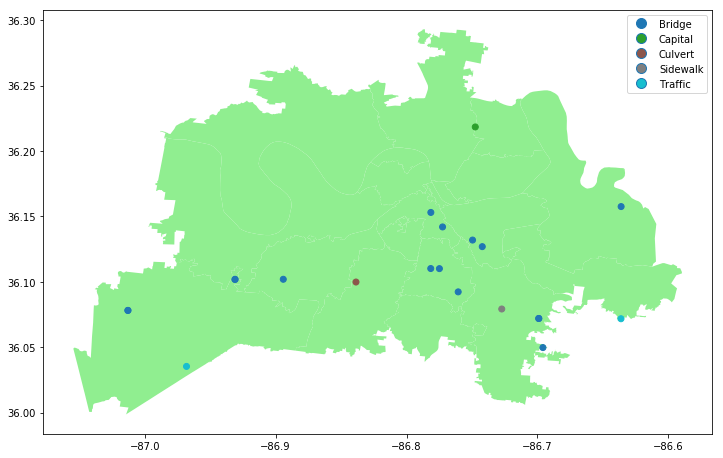

In [91]:
ax = urban_polygon.plot(figsize = (12, 12), color = 'lightgreen')
#ax is the area to use to show the plot
urban_pw.plot( ax = ax, column = 'Project_Category', legend = True);
#setting ax = ax means that we want to plot over the same area
plt.show();

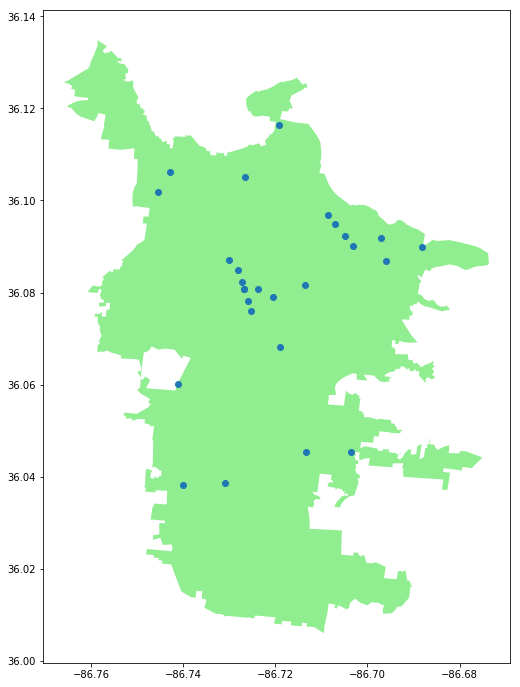

In [28]:
ax = urban_polygon.plot(figsize = (12, 12), color = 'lightgreen')
#ax is the area to use to show the plot
urban_crash.plot( ax = ax, legend = True);
#setting ax = ax means that we want to plot over the same area
plt.show();

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### Our folium map wants a center point for the street map. We'll make use of a GeoSeries attribute (.centroid) which gives us the center of a polygon.

In [29]:
#find the center of our urban_polygon and look at it
urban_polygon.geometry.centroid

48    POINT (-86.72310866739669 36.06704137683693)
dtype: object

#### The centroid is actually a pandas series; get the first element

In [30]:
# find the center of the urban polygon with the centroid property
center = urban_polygon.geometry.centroid

# get and store the first occurence which will be a Point geometry
center_point = center.iloc[0]

# print the types for center and center_point
print('center is :', type(center))
print('center_point is :', type(center_point))

center is : <class 'geopandas.geoseries.GeoSeries'>
center_point is : <class 'shapely.geometry.point.Point'>


#### Folium wants a location point as an array with *latitude* first, but shapely Points have *longitude* first

In [31]:
# center point has longitude first
print(center_point)

# reverse the order when constructing the array for folium location
urban_center = [center_point.y, center_point.x]

# check the order of urban_center, the location we'll set for our folium map
print(urban_center)

POINT (-86.72310866739669 36.06704137683693)
[36.06704137683693, -86.72310866739669]


#### Use `urban_center` as the `location` of the folium map. A zoom level of 15 should get us nice and close.

In [32]:
#create our map of Nashville and show it
map_downtown = folium.Map(location =  urban_center, zoom_start = 11)
map_downtown

#### Next, let's add our Urban Residents neighborhood polygon and art markers.

#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. Below, we are printing the row values for each row as we iterate through the GeoDataFrame of urban art. This idea will be helpful for creating our markers!

In [87]:
for row in urban_pw.iterrows():
    row_values = row[1]
    print(row_values)

CP_ID                                                            5173
Project_Number                                                    NaN
Project_Category                                               Bridge
Project_Type                                        Guardrail Repairs
Project_Name              7746 Old Charlotte Pike Culvert Replacement
Project_Location    On OLD CHARLOTTE PIKE Between OLD CHARLOTTE PI...
Description                          Install guardrail at new culvert
Justification                  Install and repair guardrail as needed
Council_District                                                   35
Plan_Cost                                                        8900
Estimated_Cost                                                   8900
Actual_Cost                                                   4450.63
Project_Cost                                                  4450.63
Percent_Spent                                                      0%
Estimated_Start     

Name: 1666, dtype: object
CP_ID                                                            5514
Project_Number                                                    NaN
Project_Category                                               Bridge
Project_Type                                        Guardrail Repairs
Project_Name                                           410 Ewing Lane
Project_Location                On EWING LN Between BRICK CHURCH PIKE
Description                                         Install guardrail
Justification       Install guardrail at location of culvert repla...
Council_District                                                   02
Plan_Cost                                                        7350
Estimated_Cost                                                   7350
Actual_Cost                                                   6979.12
Project_Cost                                                  6979.12
Percent_Spent                                                   

CP_ID                                                            5871
Project_Number                                                    NaN
Project_Category                                               Bridge
Project_Type                                                      NaN
Project_Name              Woodmont Bouluevard/West Fork Brown's Creek
Project_Location    On Woodmont Boulevard Over West Fork Brown's C...
Description         Replace paddleboard sign â€“ The work will con...
Justification       To address the bridge maintenance recommendati...
Council_District                                                   25
Plan_Cost                                                         102
Estimated_Cost                                                    102
Actual_Cost                                                         0
Project_Cost                                                      102
Percent_Spent                                                      0%
Estimated_Start     

#### The map of Nashville (`map_downtown`) has already been created.
* add the downtown neighborhood outline (urban_polygon)
* iterate through the urban art to
    * create location from each lat and lng
    * create a popup from title and type
    * build a marker from each location and popup
    * add the marker to  `map_downtown`
* display `map_downtown`

In [88]:
#draw our neighborhood: Urban Residents
folium.GeoJson(urban_polygon).add_to(map_downtown)

#iterate through our urban art to create locations and markers for each piece
#here lat is listed first!!
#also the apostrophe in the 4th row causes problems!

for row in urban_pw.iterrows():
    row_values = row[1] 
    location = [row_values['lat'], row_values['lng']]
  #  popup = (str(row_values['title']) + ': ' + 
  #           str(row_values['type']) + '<br/>' +
  #           str(row_values['desc'])).replace("'", "`")
    marker = folium.Marker(location = location)#, popup = popup)
    
    marker.add_to(map_downtown)


#display our map
map_downtown

In [33]:
#draw our neighborhood: Urban Residents
folium.GeoJson(urban_polygon).add_to(map_downtown)

#iterate through our urban art to create locations and markers for each piece
#here lat is listed first!!
#also the apostrophe in the 4th row causes problems!

for row in urban_crash.iterrows():
    row_values = row[1] 
    location = [row_values['lat'], row_values['lng']]
  #  popup = (str(row_values['title']) + ': ' + 
  #           str(row_values['type']) + '<br/>' +
  #           str(row_values['desc'])).replace("'", "`")
    marker = folium.Marker(location = location,icon=folium.Icon(color='green'))#, popup = popup)
    
    marker.add_to(map_downtown)


#display our map
map_downtown